<a href="https://colab.research.google.com/github/ashaaher/Deep-Learning/blob/master/HW1_MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


import keras
import pandas as pd
import numpy as np,sys
from keras.datasets import mnist
import copy
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
import os
np.random.seed(1)

In [0]:
import keras
import pandas as pd
import numpy as np,sys
from keras.datasets import mnist
import copy
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
import os
np.random.seed(1)

# Loading and Visualization of Dataset

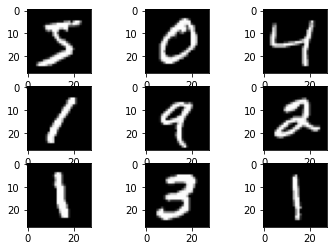

In [65]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))

# Normalizing the inputs

In [0]:
images,labels = (x_train.reshape(len(x_train), 28*28)/255,y_train)

# One hot encoding

In [0]:
one_hot_labels = np.zeros((len(labels),10))

In [0]:
for i, l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels =one_hot_labels

In [0]:
test_images = x_test.reshape(len(x_test),28*28)/255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] =1

# Image augmentation

In [0]:

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
os.makedirs('images6')


# Using 3 Neuron Layers (Input and Hidden layers)

In [0]:
np.random.seed(1)
batch_size = 3
relu = lambda x:(x>=0)*x
relu2deriv = lambda x:x>=0
def softmax(x):
   temp = np.exp(x)
   return temp/np.sum(temp,axis =1,keepdims =True)
alpha,iterations,hidden_size, pixels_per_image,num_labels =(0.001,10,100,784,10)
weights_0_1 = np.random.randn(pixels_per_image,hidden_size) * np.sqrt(2.0/hidden_size)
weights_1_2 = np.random.randn(hidden_size,100)*np.sqrt(2.0/100)
weights_2_3 = np.random.randn(100,num_labels)*np.sqrt(2.0/num_labels)


# Implementing Minibatch gradient descent along with appropriate learning rate and various dropout rates.

In [74]:
for j in range (iterations):
  correct_cnt = 0
  error =0.0
  for i in range(int(len(images)/batch_size)):
    batch_start,batch_end = ((i*batch_size),((i+1)*batch_size))
    layer_0=images[batch_start:batch_end]
    layer_1=relu(np.dot(layer_0,weights_0_1))
    dropout_mask = np.random.randint(2,size=layer_1.shape)
    layer_1 *= dropout_mask*2
    layer_2 = relu(np.dot(layer_1,weights_1_2))
    dropout_mask = np.random.randint(2,size=layer_2.shape)
    layer_2 *= dropout_mask * 2
    layer_3 = softmax(np.dot(layer_2,weights_2_3))
    error+=np.sum((labels[batch_start:batch_end]-layer_3)**2)
    #print("Finished 1st for")

    for k in range (batch_size):
      correct_cnt+=int(np.argmax(layer_3[k:k+1])==np.argmax(labels[batch_start+k:batch_start+k+1]))
    layer_3_delta = (labels[batch_start:batch_end]-layer_3)/(batch_size * layer_3.shape[0])
    layer_2_delta = layer_3_delta.dot(weights_2_3.T)*relu2deriv(layer_2)
    #layer_2_delta *= dropout_mask
    layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
    layer_1_delta *= dropout_mask
    #print("finished second for loop")

    weights_2_3 += alpha*layer_2.T.dot(layer_3_delta)
    weights_1_2 += alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1 += alpha*layer_0.T.dot(layer_1_delta)
  test_correct_cnt = 0

  for i in range (len(test_images)):
    layer_0 = test_images[i:i+1]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    layer_2 = relu(np.dot(layer_1,weights_1_2))
    layer_3 = np.dot(layer_2,weights_2_3)
    test_correct_cnt += int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
   
  if (j%10==0 or j==iterations-1):
   
  
    print("I"+str(j))
    print("Test-Acc:" + str(test_correct_cnt/float(len(test_images))))
    print(" Train-Acc:" + str(correct_cnt/float(len(images))))
    print("shape",test_labels.shape)
    print("shape",layer_3.shape)
    #print("Error "+str(error/float(len(test_images)))[0:5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


I0
Test-Acc:0.098
 Train-Acc:0.09871666666666666
shape (10000, 10)
shape (1, 10)
I9
Test-Acc:0.098
 Train-Acc:0.09871666666666666
shape (10000, 10)
shape (1, 10)
